In [1]:
!pip install sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
bmi = pd.read_csv("bmi_500.csv", index_col = 'Label')
bmi

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [4]:
gender = []
for i in bmi['Gender']:
    if i == "Male":
        gender.append(1)
    else:
        gender.append(0)
bmi["Gender"] = gender
bmi

,Gender,Height,Weight
Label,,,
Obesity,1,174,96
Normal,1,189,87
Obesity,0,185,110
Overweight,0,195,104
Overweight,1,149,61
...,...,...,...
Extreme Obesity,0,150,153
Obesity,0,184,121
Extreme Obesity,0,141,136


### 산점도를 통한 탐색적 분석

In [5]:
bmi = pd.read_csv('bmi_500.csv', index_col='Label')
# 산점도를 표시하는 함수를 만들어보자~!
def myScatter(label, color) :
    # 원하는 레이블값을 인덱싱
    tmp = bmi.loc[label]
    # scatter : 산점도로 표시하는 명령
    plt.scatter(tmp['Weight'],     # x축 데이터 설정
                tmp['Height'],     # y축 데이터 설정
                c = color,         # 색상을 결정하는 명령
                label = label      # label로 설정하는 명령
                )

In [6]:
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

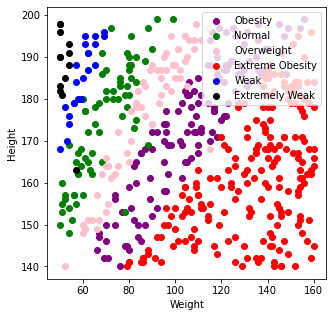

In [7]:
plt.figure(figsize=(5,5))

myScatter("Obesity","purple")
myScatter("Normal","green")
myScatter("Overweight","pink")
myScatter("Extreme Obesity","red")
myScatter("Weak","blue")
myScatter("Extremely Weak","black")

plt.legend(loc = "upper right")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [8]:
bmi = pd.read_csv('bmi_500.csv')
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [9]:
gender = []
for i in bmi['Gender']:
    if i == "Male":
        gender.append(1)
    else:
        gender.append(0)
bmi["Gender"] = gender
bmi

,Gender,Height,Weight,Label
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,Overweight
4,1,149,61,Overweight
...,...,...,...,...
495,0,150,153,Extreme Obesity
496,0,184,121,Obesity
497,0,141,136,Extreme Obesity
498,1,150,95,Extreme Obesity


In [10]:
# 독립변수, 종속변수 구분
x = bmi.loc[:, "Height" : "Weight"]
y=bmi.loc[:, "Label"]

In [11]:
print(x.shape)
print(y.shape)

(500, 2)
(500,)


In [12]:
# train-test split

x_train = x.iloc[:350, :]
y_train = y.iloc[:350]


x_test = x.iloc[350:, :]
y_test = y.iloc[350:]

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(350, 2)
(350,)
(150, 2)
(150,)


In [14]:
model = KNeighborsClassifier(n_neighbors= 10)
#model = DecisionTreeClassifier()

In [15]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
prediction = model.predict(x_test)
prediction

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Overweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obes

In [17]:
metrics.accuracy_score(prediction, y_test)

0.94

In [18]:
model.predict([[180, 78]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)

## 데이터 소개

In [19]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=58844e4b4499a14609a6ab848ab715ccae96cd2b80d5750ba1b761b1aa3c431a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


In [20]:
import mglearn

In [21]:
x, y = mglearn.datasets.make_forge()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [24]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

X.shape: (26, 2)


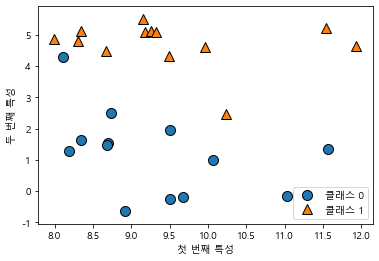

In [25]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", x.shape)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


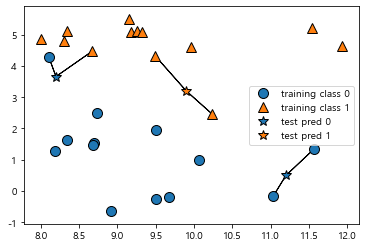

In [27]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

In [30]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc

x, y = mglearn.datasets.make_forge()
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

In [33]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
print('테스트 세트 예측 :', model.predict(x_test))
print('테스트 세트 정확도 : {:.2f}'.format(model.score(x_test, y_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]
테스트 세트 정확도 : 0.86


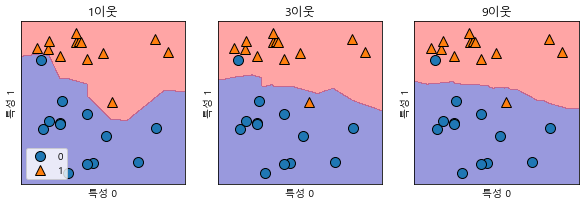

In [35]:
gif, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes) :
    
    model = KNeighborsClassifier(n_neighbors= n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(model, x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:,0], x[:,1], y, ax=ax)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

## min-max scaler

In [41]:
import numpy as np
import pandas as pd
data = [1,2,3,4,5,6,7,8,9,10,25,77,38.5]

In [42]:
max_value = np.max(data)
min_value = np.min(data)

min_max_scaling = []
for i in data:
    min_max_scaling.append((i - min_value)/(max_value - min_value))
min_max_scaling    

[0.0,
 0.013157894736842105,
 0.02631578947368421,
 0.039473684210526314,
 0.05263157894736842,
 0.06578947368421052,
 0.07894736842105263,
 0.09210526315789473,
 0.10526315789473684,
 0.11842105263157894,
 0.3157894736842105,
 1.0,
 0.4934210526315789]

In [43]:
from sklearn.preprocessing import MinMaxScaler
data = np.array(data)
scaler = MinMaxScaler()
scaler.fit(data.reshape(-1, 1))
scaled_data = scaler.transform(data.reshape(-1,1))
print(scaled_data)

[[0.        ]
 [0.01315789]
 [0.02631579]
 [0.03947368]
 [0.05263158]
 [0.06578947]
 [0.07894737]
 [0.09210526]
 [0.10526316]
 [0.11842105]
 [0.31578947]
 [1.        ]
 [0.49342105]]


In [44]:
max_value = np.max(data)
min_value = np.min(data)

min_max_scaling = []
for i in data:
    min_max_scaling.append((i - min_value)/(max_value - min_value))
min_max_scaling

[0.0,
 0.013157894736842105,
 0.02631578947368421,
 0.039473684210526314,
 0.05263157894736842,
 0.06578947368421052,
 0.07894736842105263,
 0.09210526315789473,
 0.10526315789473684,
 0.11842105263157894,
 0.3157894736842105,
 1.0,
 0.4934210526315789]

In [45]:
print(scaler.n_samples_seen_)
print()

13


In [46]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [48]:
cancer = load_breast_cancer()

In [49]:
for i in cancer.keys():
    try:
        print(len(cancer[i]))
    except:
        print("No")

569
569
No
2
5044
30
17
21


In [51]:
data = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
target = pd.DataFrame(cancer["target"], columns=["target"])
can = pd.concat([data,target], axis = 1)

can

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [52]:
can["target"].value_counts(0)

1    357
0    212
Name: target, dtype: int64

In [57]:
x_train, x_test, y_train, y_test = train_test_split(can[cancer["feature_names"]],can["target"], random_state = 0)     
# 왼쪽이 종속변수 오른쪽 독립변수

In [58]:
can[['mean radius','mean texture']]

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [59]:
list(cancer["feature_names"])

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [60]:
from tqdm import tqdm

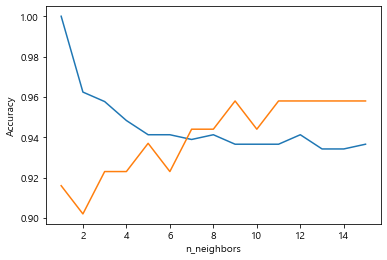

In [66]:
train_acc = []
test_acc = []
for i in range(1, 16):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    
    train_acc.append(model.score(x_train,y_train))
    test_acc.append(model.score(x_test,y_test))

plt.plot(range(1, 16), train_acc, label = "Train Accuracy")   
plt.plot(range(1, 16), test_acc, label = "Test Accuracy")   
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend
plt.show()

In [67]:
test_acc[6]

0.9440559440559441

In [68]:
test_acc[7]

0.9440559440559441

### 최적의 파라미터 찾기 (과소적합도 과대적합도 아닌 파라미터)
 1. 과소적합이 아닌 조건 : Test Accuracy가 높다.
 2. 과대적합이 아닌 조건: Train Accuracy와 TestAccuracy의 차이가 적다.

In [73]:
best_train_acc = 0
best_test_acc = 0

for i in tqdm(range(1, 16)):                            # 하이퍼파라미터를 1~15 를 순차적으로 적용
    model = KNeighborsClassifier(n_neighbors = i)       # 모델선언
    model.fit(x_train, y_train)                         # 모델 학습
    
    test_acc = model.score(x_test, y_test)
    train_acc = model.score(x_train, y_train)
    if best_test_acc < test_acc:
        best_test_acc = test_acc
        best_train_acc = train_acc
        best_k = i
    elif test_acc == best_test_acc:
        if abs(best_test_acc - best_train_acc) > abs(test_acc - train_acc):
            best_test_acc = test_acc
            best_train_acc = train_acc
            best_k = i
        else:
            pass
    else:
        pass
print(best_k)

100%|██████████| 15/15 [00:00<00:00, 27.89it/s]

12
